### Import all libraries that may require

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt

###  Import data from csv file to 

In [2]:
Fraud_Data = pd.read_csv('creditcard.csv',delimiter=',')
print ('Data imported')

Data imported


### Checking if data has null values 

In [3]:
Fraud_Data[Fraud_Data.apply(lambda x: min(x) == max(x), 1)] 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [4]:
Fraud_Data.isnull().any(axis=1).filter('True')

Series([], dtype: bool)

### Find out Covarience matrix

In [5]:
Fraud_Data.cov().to_csv("covarience_matrix.csv")

In [6]:
Fraud_Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
Fraud_Data1 = Fraud_Data[['V18','V4','V11','V7','V3','V10','V16','V12','V14','V17']] # Higher Co-relation
output_label = Fraud_Data[['Class']]

In [8]:
Fraud_Data1.head()

,V18,V4,V11,V7,V3,V10,V16,V12,V14,V17
0,0.025791,1.378155,-0.551600,0.239599,2.536347,0.090794,-0.470401,-0.617801,-0.311169,0.207971
1,-0.183361,0.448154,1.612727,-0.078803,0.166480,-0.166974,0.463917,1.065235,-0.143772,-0.114805
2,-0.121359,0.379780,0.624501,0.791461,1.773209,0.207643,-2.890083,0.066084,-0.165946,1.109969
3,1.965775,-0.863291,-0.226487,0.237609,1.792993,-0.054952,-1.059647,0.178228,-0.287924,-0.684093
4,-0.038195,0.403034,-0.822843,0.592941,1.548718,0.753074,-0.451449,0.538196,-1.119670,-0.237033


In [30]:
train_indices = np.random.rand(len(Fraud_Data1)) < 0.8
train = Fraud_Data1[train_indices]
output_train = output_label[train_indices]
test = Fraud_Data1[~train_indices]
output_test = output_label[~train_indices]

In [31]:
train_all = Fraud_Data[train_indices]
test_all = Fraud_Data[~train_indices]

## SVM

In [17]:
from sklearn import svm

### Using only top 10 col with highest correlation

In [18]:
svm_classifier = sk.svm.SVC()

In [19]:
svm_classifier.fit(train,output_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
prediction = svm_classifier.predict(test)

### Data Analysis

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(output_test,prediction)

0.99929526594901252

In [22]:
sk.metrics.confusion_matrix(output_test,prediction)

array([[56655,     3],
       [   37,    64]])

In [27]:
precision, recall, thresholds = sk.metrics.precision_recall_curve(output_test,prediction)


array([ 1.        ,  0.63366337,  0.        ])

In [25]:
plt.plot(recall,precision)

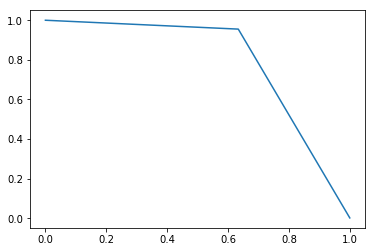

In [28]:
plt.show()

### Using all columns

In [ ]:
svm_classifier.fit(train_all,output_train)

In [ ]:
prediction_all = svm_classifier.predict(test_all)

In [ ]:
accuracy_score(output_test,prediction_all)

In [ ]:
sk.metrics.confusion_matrix(output_test,prediction_all)

In [ ]:
precision, recall, thresholds = precision_recall_curve(output_test,prediction_all)

In [ ]:
plt.plot(recall,precision)

In [ ]:
plt.show()